In [2]:
import yt
import numpy as np
import math
import matplotlib.pyplot as plt

/usr/lib/python3.8/_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [3]:
def return_y_plt(folder,time,nbins,field):
    ds = yt.load(folder+time)
    ad = ds.all_data()
    plot = yt.ProfilePlot(ad,"x",[field],weight_field="cell_volume",x_log=False,y_log={field:False},n_bins=nbins)
    profile = plot.profiles[0]
    x = np.array(profile.x)
    y = np.array(profile[field])
    return x, y

In [4]:
def return_data(folder,size,lo,hi,field):    
    ds = yt.load(folder)
    ad = ds.all_data()
    df=ad.to_dataframe(fields=field)
    data=np.zeros((size[0],size[1],size[2]))
    for i in range(size[0]):
        for j in range(size[1]):
            for k in range(size[2]):
                data[i,j,k]=df.iat[i*size[2]*size[1]+j*size[2]+k,0]
                
    xCell=(hi[0]-lo[0])/size[0]
    yCell=(hi[1]-lo[1])/size[1]
    zCell=(hi[2]-lo[2])/size[2]
    
    xGrid = np.linspace(lo[0]+0.5*xCell,hi[0]-0.5*xCell,size[0])
    yGrid = np.linspace(lo[1]+0.5*yCell,hi[1]-0.5*yCell,size[1])
    zGrid = np.linspace(lo[2]+0.5*zCell,hi[2]-0.5*zCell,size[2])
    
    return xGrid, yGrid, zGrid, data

In [12]:
time = "plt_SF_prim_mag022000000"
directory= "~/giganScratch/SFtesting/SFtest1/"
xk, yk, zk, sf_u_c00_full = return_data(directory+time,[128,16,4],[0,0,0],[0.00160256,0.00020032,1.252e-07],"struct_fact_uInstant_cInstant_00")
xk, yk, zk, sf_u00_c00_full = return_data(directory+time,[128,16,4],[0,0,0],[0.00160256,0.00020032,1.252e-07],"struct_fact_uInstant_00_cInstant_00")

yt : [INFO     ] 2023-01-17 12:06:01,290 Parameters: current_time              = 0.0021999999005392697
yt : [INFO     ] 2023-01-17 12:06:01,291 Parameters: domain_dimensions         = [128  16   4]
yt : [INFO     ] 2023-01-17 12:06:01,293 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2023-01-17 12:06:01,294 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]
yt : [INFO     ] 2023-01-17 12:06:01,535 Parameters: current_time              = 0.0021999999005392697
yt : [INFO     ] 2023-01-17 12:06:01,535 Parameters: domain_dimensions         = [128  16   4]
yt : [INFO     ] 2023-01-17 12:06:01,536 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2023-01-17 12:06:01,537 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]


In [13]:
sf_u_c00 = sf_u_c00_full[64,9:16,2]
sf_u00_c00 = sf_u00_c00_full[64,9:16,2]

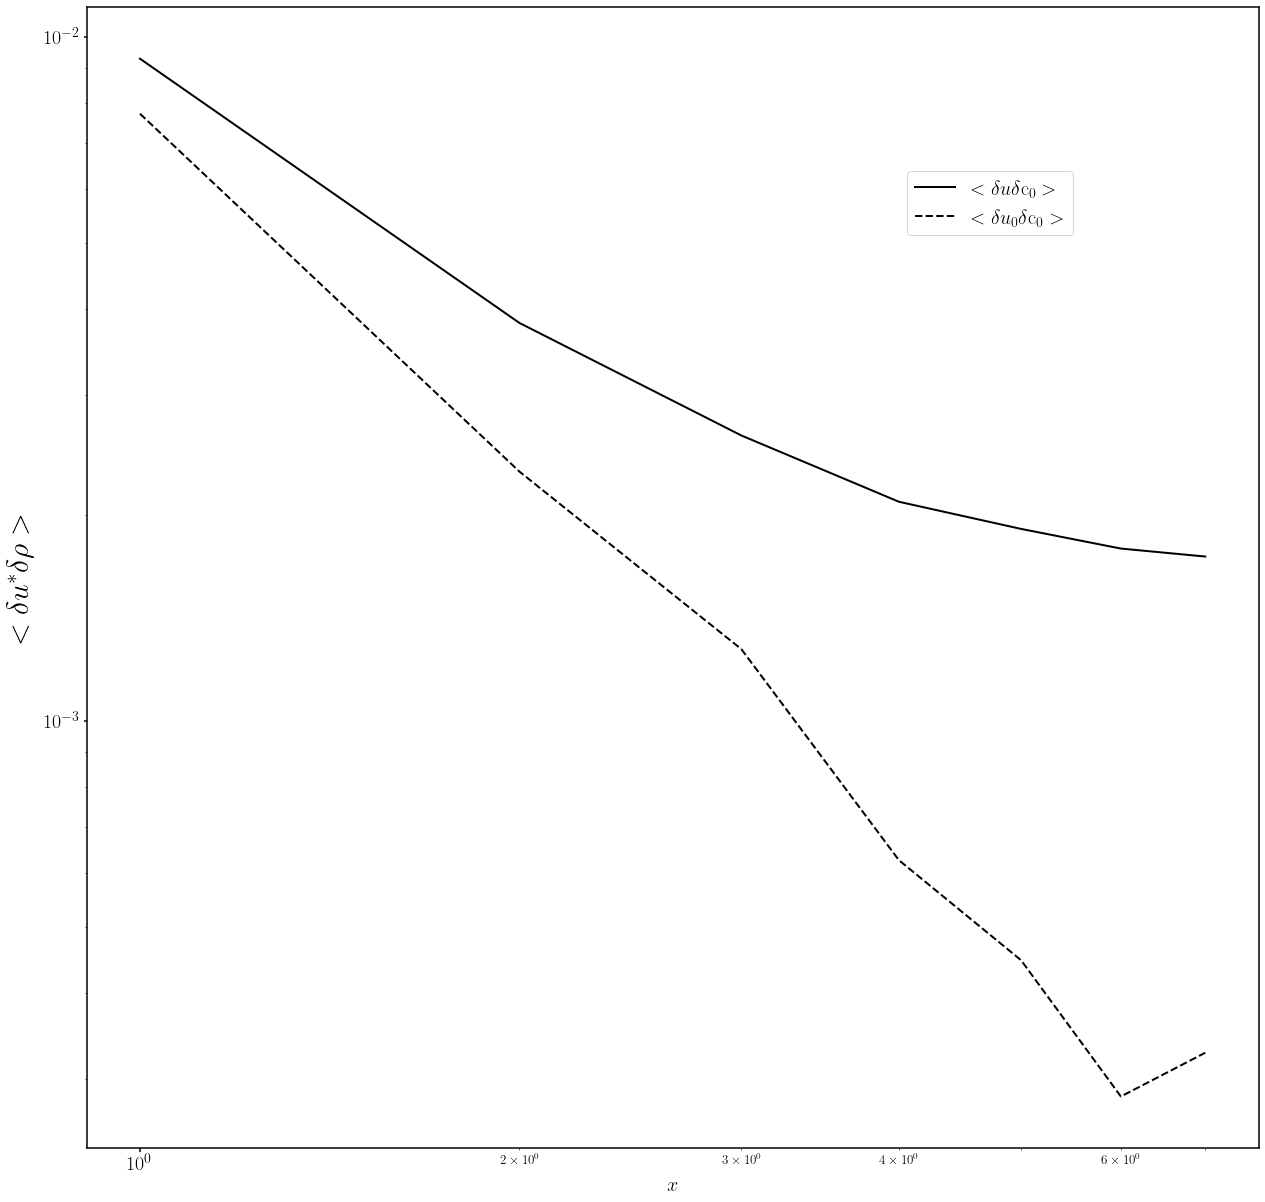

In [14]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,21])
plt.subplots_adjust(wspace=0.25)

xd=[1,2,3,4,5,6,7]
dx=(0.00160256/128)**3

#xl=[1,15]
#yl=[ydata1[0]/dx,ydata1[0]*1/(15**2)/dx]
ax1 = fig.add_subplot(1,1,1)

ax1.plot(xd,sf_u_c00/dx,color='black',linewidth=2, label=r"$<\delta u\delta \mathrm{c}_0>$")
ax1.plot(xd,sf_u00_c00/dx,color='black',linewidth=2,linestyle='dashed', label=r"$<\delta u_0\delta \mathrm{c}_0>$")

#ax1.plot(xFHDb,yFHD1b,color='black',linewidth=2,linestyle='dashed', label='FHD')


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r"$<\delta u^*\delta \rho>$", fontsize=30,rotation=90, labelpad=10)
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.7,0.8),fontsize=20)
#ax1.set_ylim([-100e-21,50e-21])
#ax1.set_ylim([-10e-21,5e-21])
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

In [8]:
time = "/pltcu0000"+"60000000/"
directory= "~/giganScratch/SFtesting/1Dtest2"
x, DSMC_rhoMean_00 = return_y_plt(directory,time,nbins=128,field="rhoMean_00")
x, DSMC_rhoMean_01 = return_y_plt(directory,time,nbins=128,field="rhoMean_01")
x, DSMC_rhoMean = return_y_plt(directory,time,nbins=128,field="rhoMean")

time = "/pltprim0000"+"60000000/"
x, DSMC_TMean = return_y_plt(directory,time,nbins=128,field="TMean")



time = "/plt1"+"49999999/"
directory= "~/giganScratch/SFtesting/FHDtest"
x, FHD_rhoMean_00 = return_y_plt(directory,time,nbins=128,field="rhoYkMean_0")
x, FHD_rhoMean_01 = return_y_plt(directory,time,nbins=128,field="rhoYkMean_1")
x, FHD_rhoMean = return_y_plt(directory,time,nbins=128,field="rhoMean")
x, FHD_TMean = return_y_plt(directory,time,nbins=128,field="tMean")


yt : [INFO     ] 2023-01-21 13:01:17,394 Parameters: current_time              = 0.0017999999723411837
yt : [INFO     ] 2023-01-21 13:01:17,396 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2023-01-21 13:01:17,397 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-21 13:01:17,398 Parameters: domain_right_edge         = [3.84e-04 3.50e-06 3.50e-06]
yt : [INFO     ] 2023-01-21 13:01:18,783 Parameters: current_time              = 0.0017999999723411837
yt : [INFO     ] 2023-01-21 13:01:18,785 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2023-01-21 13:01:18,786 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-21 13:01:18,788 Parameters: domain_right_edge         = [3.84e-04 3.50e-06 3.50e-06]
yt : [INFO     ] 2023-01-21 13:01:19,738 Parameters: current_time              = 0.0017999999723411837
yt : [INFO     ] 2023-01-21 13:01:19,739 Parameters: domain_dimensions         = [128   1   1]
yt

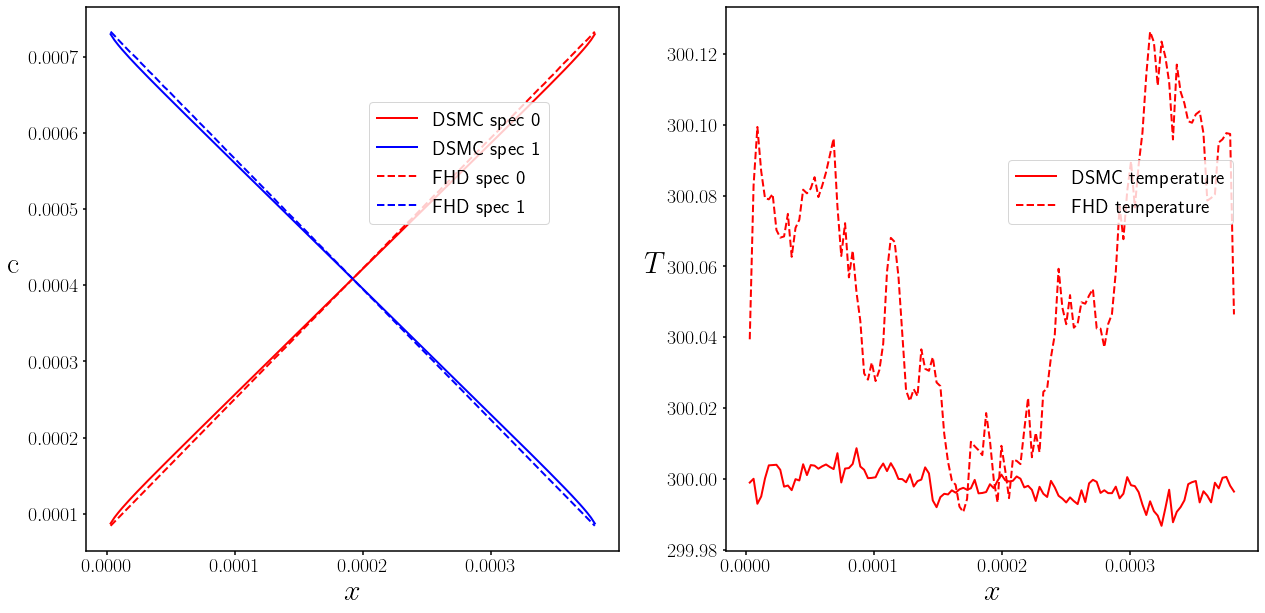

In [9]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)

ax1 = fig.add_subplot(1,2,1)

ax1.plot(x,DSMC_rhoMean_00,color='red',linewidth=2, label='DSMC spec 0')
ax1.plot(x,DSMC_rhoMean_01,color='blue',linewidth=2, label='DSMC spec 1')
ax1.plot(x,FHD_rhoMean_00,color='red',linewidth=2,linestyle='dashed', label='FHD spec 0')
ax1.plot(x,FHD_rhoMean_01,color='blue',linewidth=2,linestyle='dashed', label='FHD spec 1')


ax1.set_xlabel(r'$x$', fontsize=30)
ax1.set_ylabel(r"$\mathrm{c}$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.53,0.6),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

ax2 = fig.add_subplot(1,2,2)

ax2.plot(x,DSMC_TMean,color='red',linewidth=2, label='DSMC temperature')
ax2.plot(x,FHD_TMean,color='red',linewidth=2,linestyle='dashed', label='FHD temperature')

ax2.set_xlabel(r'$x$', fontsize=30)
ax2.set_ylabel(r"$T$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.53,0.6),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)


In [28]:
import statistics
print(statistics.mean(TMean_a))
print(statistics.mean(TMean))
print(statistics.mean(TInstant_a))

272.9998743067228
273.0021233024646
272.979316706996


In [10]:
## 1: rho*.rho   ## 20: T*.T (indirect)  ## 27: T*.T (direct)
## 3: jx*.jx     ## 21: T*.rho           ## 35-37: Y_i*.Y_k (37: Y0*.Y1)
## 6: jx*.rho    ## 22: u*.rho           ## 38-40: rho_i*.rho_k (40: rho1*.rho0)
## 7: jx*.rho_0  ## 23-24: u*.rho_i      ## 41-42: Y_i.*Y_k (indirect)
## 8: jx*.rho_1  ## 25-26: u*.Y_i

#1Dtest2: Thermal walls 
#1Dtest3: Adiabatic walls
#1Dtest4: Concentration plus Thermal gradient
#1Dtest5: 4 with some more output

0.2554487863148698
0.7445512136851616


In [6]:
#time = "/pltvar0000"+"02500000/"
#directory= "~/giganScratch/SFtesting/1Dtest2"
#xDSMC, DSMC_rho0rho0_I = return_y_plt(directory,time,nbins=128,field="rho_00*.rho_00")
#xDSMC, DSMC_jrho0_I = return_y_plt(directory,time,nbins=128,field="Jx*.rho_00")
#xDSMC, DSMC_jrho1_I = return_y_plt(directory,time,nbins=128,field="Jx*.rho_01")
#xDSMC, DSMC_j1rho0_I = return_y_plt(directory,time,nbins=128,field="Jx_01*.rho_00")

#time = "/pltvar0000"+"02500000/"
#directory= "~/giganScratch/SFtesting/1Dtest3"
#xDSMC, DSMC_rho0rho0_A = return_y_plt(directory,time,nbins=128,field="rho_00*.rho_00")
#xDSMC, DSMC_jrho0_A = return_y_plt(directory,time,nbins=128,field="Jx*.rho_00")
#xDSMC, DSMC_jrho1_A = return_y_plt(directory,time,nbins=128,field="Jx*.rho_01")
#xDSMC, DSMC_j1rho0_A = return_y_plt(directory,time,nbins=128,field="Jx_01*.rho_00")

time = "/pltvar0000"+"45000000/"
directory= "~/giganScratch/SFtesting/1Dtest5"
xDSMC, DSMC_rho0rho0_T = return_y_plt(directory,time,nbins=128,field="rho_00*.rho_00")
xDSMC, DSMC_rho1rho1_T = return_y_plt(directory,time,nbins=128,field="rho_01*.rho_01")
xDSMC, DSMC_j0rho_T = return_y_plt(directory,time,nbins=128,field="Jx_00*.rho")
xDSMC, DSMC_j1rho_T = return_y_plt(directory,time,nbins=128,field="Jx_01*.rho")
xDSMC, DSMC_jrho_T = return_y_plt(directory,time,nbins=128,field="Jx*.rho")
xDSMC, DSMC_jrho0_T = return_y_plt(directory,time,nbins=128,field="Jx*.rho_00")
xDSMC, DSMC_urho0_T = return_y_plt(directory,time,nbins=128,field="ux*.rho_00")
xDSMC, DSMC_jrho1_T = return_y_plt(directory,time,nbins=128,field="Jx*.rho_01")
xDSMC, DSMC_jj_T = return_y_plt(directory,time,nbins=128,field="Jx*.Jx")
xDSMC, DSMC_urho0_T_cell = return_y_plt(directory,time,nbins=128,field="rho0.u")
xDSMC, DSMC_jrho0_T_cell = return_y_plt(directory,time,nbins=128,field="rho0.Jx")
xDSMC, DSMC_jj_T_cell = return_y_plt(directory,time,nbins=128,field="JxVar")
xDSMC, DSMC_KK_T_cell = return_y_plt(directory,time,nbins=128,field="KVar")

time = "/pltvar0000"+"20000000/"
directory= "~/giganScratch/SFtesting/1Dtest2"
xDSMC, DSMC_jj_T_cell_EQ = return_y_plt(directory,time,nbins=128,field="JxVar")
xDSMC, DSMC_KK_T_cell_EQ = return_y_plt(directory,time,nbins=128,field="KVar")
xDSMC, DSMC_rhorho_T_cell_EQ = return_y_plt(directory,time,nbins=128,field="rhoVar")


#time = "/pltvar0000"+"05500000/"
#directory= "~/giganScratch/SFtesting/1Dtest4"
#xDSMC, DSMC_rho0rho0_T = return_y_plt(directory,time,nbins=128,field="rho_00*.rho_00")


filenames = ['/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_039999999',
             '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_034999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_029999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_024999999',
             '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_019999999',
             '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_014999999',
             '/home/drladiges/giganScratch/SFtesting/FHDtest2/spatialCross1D_009999999'
            ]

directory='/home/drladiges/giganScratch/SFtesting/FHDtest2/'
times = ['/plt039999999/',
             '/plt034999999/',
            '/plt029999999/',
            '/plt024999999/',
             '/plt019999999/',
             '/plt014999999/',
             '/plt009999999/'
            ]
directoryEq='/home/drladiges/giganScratch/SFtesting/FHDtest/'

FF=len(times)

dataTmp = np.loadtxt(filenames[0], delimiter=' ', skiprows=0, dtype=str)
LL=len(dataTmp)

xFHD=np.zeros(LL)
FHD_rho0rho0=np.zeros(LL)
FHD_rho1rho1=np.zeros(LL)
FHD_jrho0=np.zeros(LL)
FHD_urho0=np.zeros(LL)
FHD_urho1=np.zeros(LL)
FHD_jrho1=np.zeros(LL)
FHD_jrho=np.zeros(LL)
FHD_jj=np.zeros(LL)
FHD_jrho_cell=np.zeros(LL)
FHD_jj_cell_FACE=np.zeros(LL)
FHD_jj_cell_CC=np.zeros(LL)
FHD_KK_cell=np.zeros(LL)

FHD_jj_cell_EQ_FACE=np.zeros(LL)
FHD_jj_cell_EQ_CC=np.zeros(LL)
FHD_KK_cell_EQ=np.zeros(LL)
FHD_rhorho_cell_EQ=np.zeros(LL)


for j in range(FF):
    data = np.loadtxt(filenames[j], delimiter=' ', skiprows=0, dtype=str)
    
    for i in range(LL):
        val=float(data[i,0])
        xFHD[i] = xFHD[i]+val
        val1=float(data[i,38])
        val2=float(data[i,7])
        val3=float(data[i,8])
        val4=float(data[i,6])
        val5=float(data[i,3])
        val6=float(data[i,39])
        val7=float(data[i,23])
        val8=float(data[i,24])
        FHD_rho0rho0[i] = FHD_rho0rho0[i] + val1
        FHD_jrho0[i] = FHD_jrho0[i] + val2
        FHD_jrho1[i] = FHD_jrho1[i] + val3
        FHD_jrho[i] = FHD_jrho[i] + val4
        FHD_jj[i] = FHD_jj[i] + val5
        FHD_rho1rho1[i] = FHD_rho1rho1[i] + val6
        FHD_urho0[i] = FHD_urho0[i] + val7
        FHD_urho1[i] = FHD_urho1[i] + val7
    
    xFHDt, valt = return_y_plt(directory,times[j],nbins=128,field="rhoYkH-vx")
    FHD_urho0_cell = FHD_jrho_cell + valt
    
    xFHDt, valt = return_y_plt(directory,times[j],nbins=128,field="jxVarCC")
    FHD_jj_cell_CC = FHD_jj_cell_CC + valt
    
    xFHDt, valt = return_y_plt(directory,times[j],nbins=128,field="jxVarFACE")
    FHD_jj_cell_FACE = FHD_jj_cell_FACE + valt
    
    xFHDt, valt = return_y_plt(directory,times[j],nbins=128,field="rhoEVar")
    FHD_KK_cell = FHD_KK_cell + valt
    
    xFHDt, valt = return_y_plt(directoryEq,times[j],nbins=128,field="rhoEVar")
    FHD_KK_cell_EQ = FHD_KK_cell_EQ + valt
    
    xFHDt, valt = return_y_plt(directoryEq,times[j],nbins=128,field="jxVarFACE")
    FHD_jj_cell_EQ_FACE = FHD_jj_cell_EQ_FACE + valt
    
    xFHDt, valt = return_y_plt(directoryEq,times[j],nbins=128,field="jxVarCC")
    FHD_jj_cell_EQ_CC = FHD_jj_cell_EQ_CC + valt
    
    xFHDt, valt = return_y_plt(directoryEq,times[j],nbins=128,field="rhoVar")
    FHD_rhorho_cell_EQ = FHD_rhorho_cell_EQ + valt
    
        
xFHD = xFHD/FF
FHD_rho0rho0 = FHD_rho0rho0/FF
FHD_rho1rho1 = FHD_rho1rho1/FF
FHD_jrho0 = FHD_jrho0/FF
FHD_urho0 = FHD_urho0/FF
FHD_urho1 = FHD_urho0/FF
FHD_jrho1 = FHD_jrho1/FF
FHD_jrho = FHD_jrho/FF
FHD_jj = FHD_jj/FF
FHD_urho0_cell = FHD_urho0_cell/FF
FHD_jj_cell_FACE = FHD_jj_cell_FACE/FF
FHD_jj_cell_CC = FHD_jj_cell_CC/FF
FHD_KK_cell = FHD_KK_cell/FF
FHD_KK_cell_EQ = FHD_KK_cell_EQ/FF
FHD_rhorho_cell_EQ = FHD_rhorho_cell_EQ/FF
FHD_jj_cell_EQ_CC = FHD_jj_cell_EQ_CC/FF
FHD_jj_cell_EQ_FACE = FHD_jj_cell_EQ_FACE/FF
    
DSMC_rho0rho0_T[32] = (DSMC_rho0rho0_T[31]+DSMC_rho0rho0_T[33])/2
DSMC_rho1rho1_T[32] = (DSMC_rho1rho1_T[31]+DSMC_rho1rho1_T[33])/2
DSMC_jj_T[32] = (DSMC_jj_T[31]+DSMC_jj_T[33])/2
#DSMC_jrho0_T[32] = (DSMC_jrho0_T[31]+DSMC_jrho0_T[33])/2
#DSMC_jrho1_T[32] = (DSMC_jrho1_T[31]+DSMC_jrho1_T[33])/2
#DSMC_rho0rho0_A[32] = (DSMC_rho0rho0_A[31]+DSMC_rho0rho0_A[33])/2
FHD_rho0rho0[32] = (FHD_rho0rho0[31]+FHD_rho0rho0[33])/2
FHD_rho1rho1[32] = (FHD_rho1rho1[31]+FHD_rho1rho1[33])/2
#FHD_jj[32] = (FHD_jj[31]+FHD_jj[33])/2
xDSMC = xDSMC - 1.5e-06




yt : [INFO     ] 2023-01-30 11:03:54,929 Parameters: current_time              = 0.0013499999708866885
yt : [INFO     ] 2023-01-30 11:03:54,930 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2023-01-30 11:03:54,930 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-30 11:03:54,931 Parameters: domain_right_edge         = [3.84e-04 3.50e-06 3.50e-06]
yt : [INFO     ] 2023-01-30 11:03:57,090 Parameters: current_time              = 0.0013499999708866885
yt : [INFO     ] 2023-01-30 11:03:57,091 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2023-01-30 11:03:57,092 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-30 11:03:57,092 Parameters: domain_right_edge         = [3.84e-04 3.50e-06 3.50e-06]
yt : [INFO     ] 2023-01-30 11:03:58,055 Parameters: current_time              = 0.0013499999708866885
yt : [INFO     ] 2023-01-30 11:03:58,056 Parameters: domain_dimensions         = [128   1   1]
yt

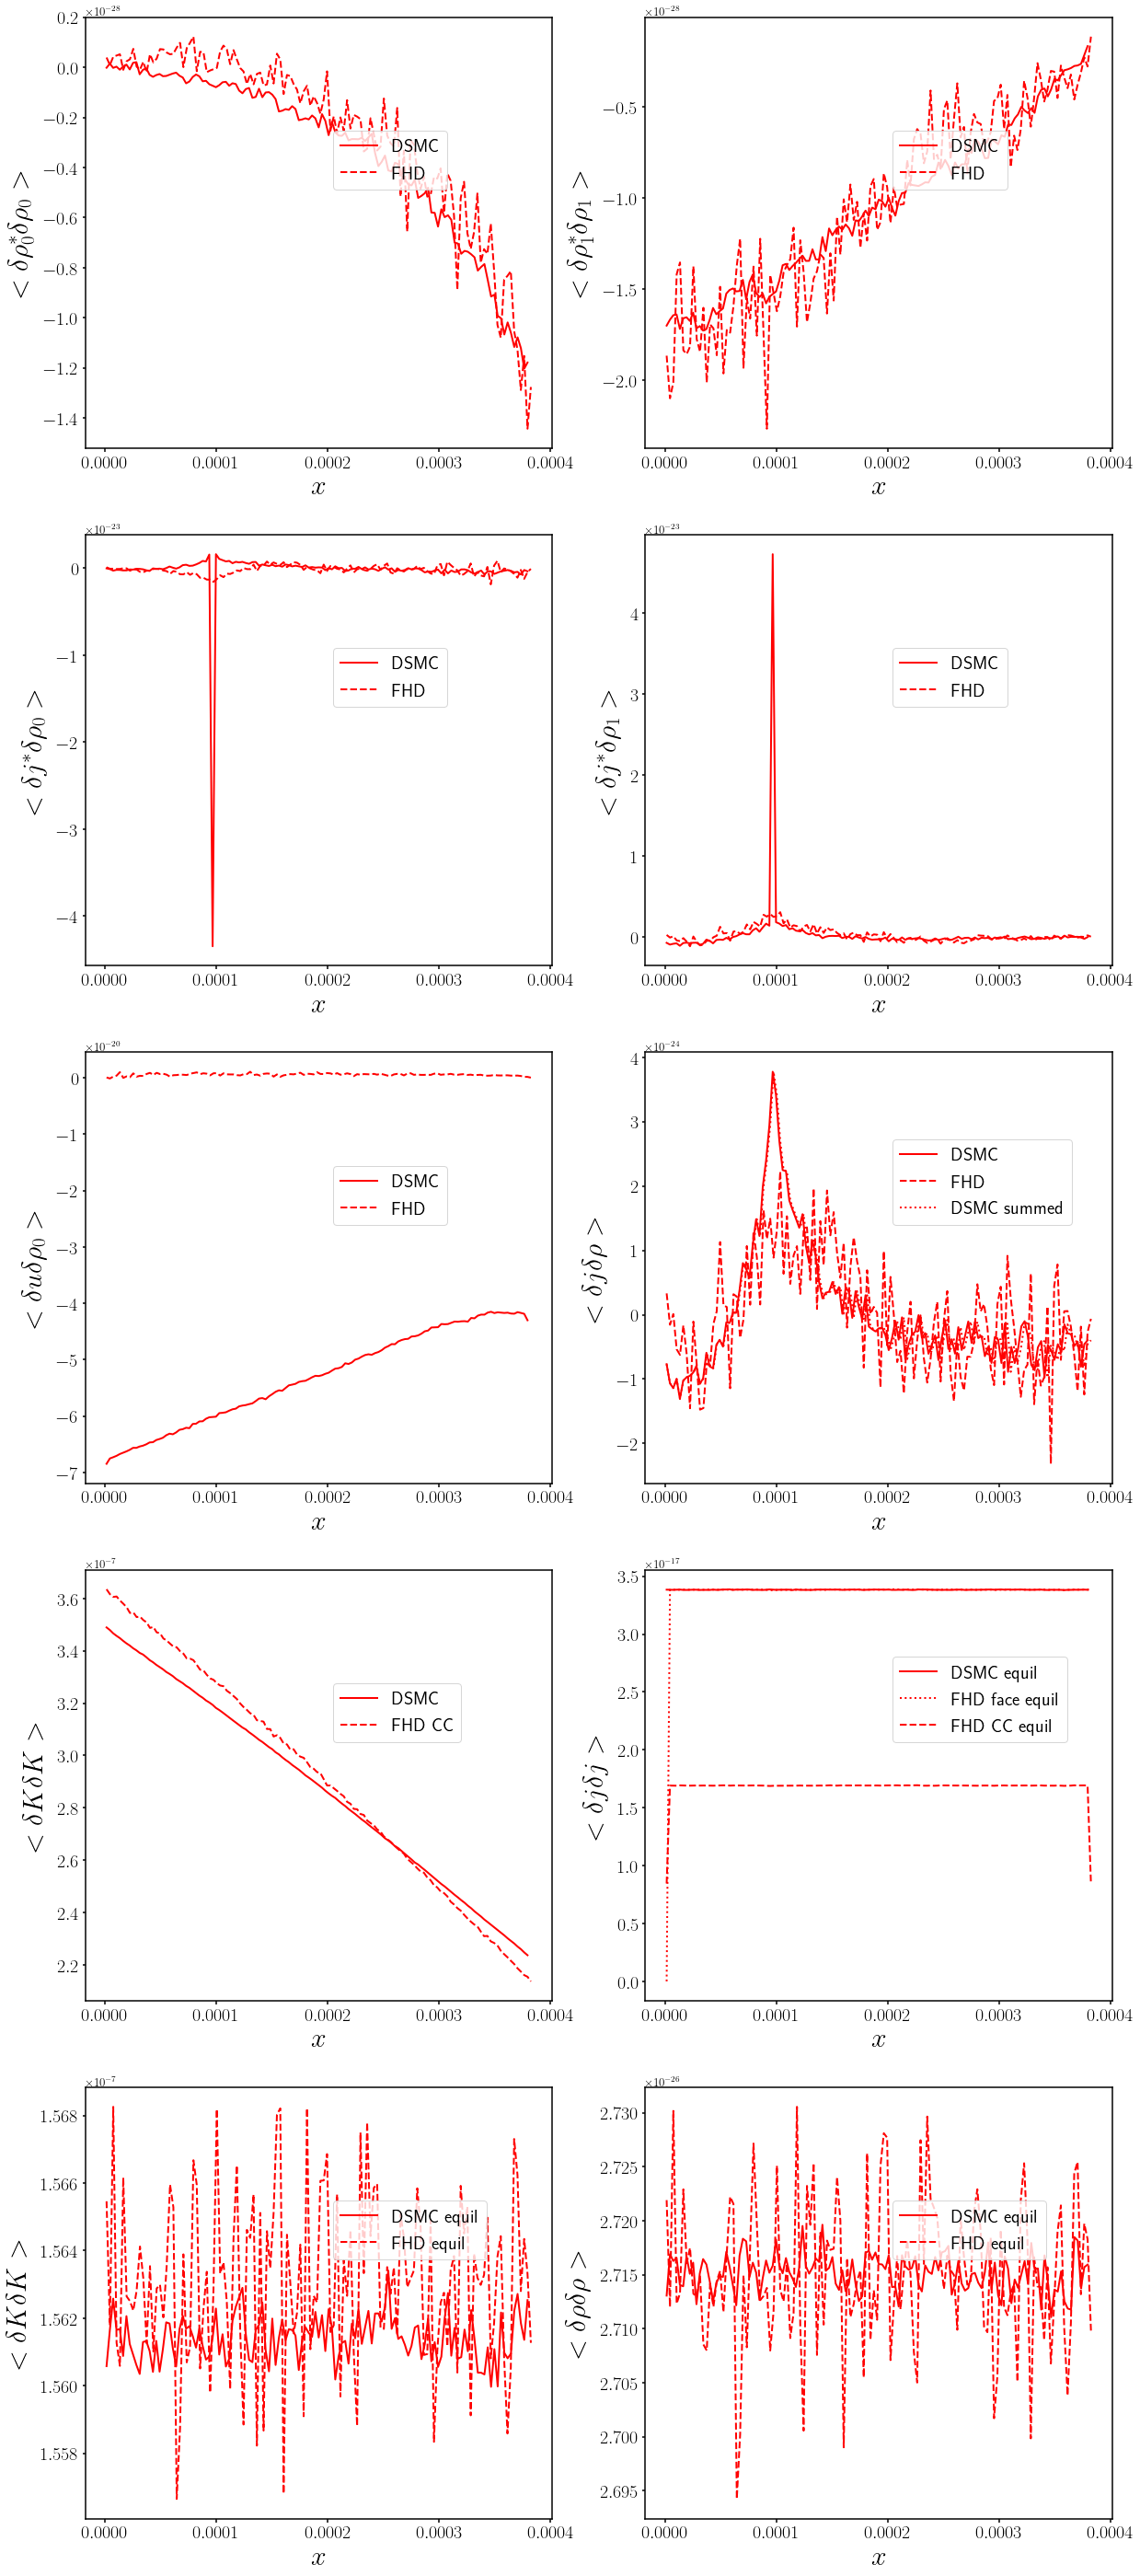

In [7]:
dvDSMC = (3.84e-4/128)*(0.035e-4)**2
dvFHD = (3.84e-4/128)*(0.3e-5)**2

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[20,50])
plt.subplots_adjust(wspace=0.20)

ax1 = fig.add_subplot(5,2,1)

#ax1.plot(xDSMC,dv*DSMC_rho0rho0_T,color='red',linewidth=2, label='DSMC')
ax1.plot(xDSMC,dvDSMC*DSMC_rho0rho0_T,color='red',linewidth=2, label='DSMC')
#ax1.plot(xDSMC,DSMC_rho0rho0_A,color='blue',linewidth=2, label='DSMC Adiabatic')
#ax1.plot(xFHD,dv*FHD_rho0rho0,color='red',linewidth=2,linestyle='dashed', label='FHD')
ax1.plot(xFHD,dvFHD*FHD_rho0rho0,color='red',linewidth=2,linestyle='dashed', label='FHD')

ax1.set_xlabel(r'$x$', fontsize=30)
ax1.set_ylabel(r"$<\delta \rho_0^* \delta \rho_0 >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-2e-19,1e-18])
#ax1.set_xlim([-0.1e-7,2e-7])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.53,0.6),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)

ax2 = fig.add_subplot(5,2,2)

ax2.plot(xDSMC,dvDSMC*DSMC_rho1rho1_T,color='red',linewidth=2, label='DSMC')
#ax2.plot(xDSMC,DSMC_jrho0_A,color='blue',linewidth=2, label='DSMC Adiabatic')
ax2.plot(xFHD,dvFHD*FHD_rho1rho1,color='red',linewidth=2,linestyle='dashed', label='FHD')

ax2.set_xlabel(r'$x$', fontsize=30)
ax2.set_ylabel(r"$<\delta \rho_1^* \delta \rho_1 >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.53,0.6),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)

ax3 = fig.add_subplot(5,2,3)

ax3.plot(xDSMC,dvDSMC*DSMC_jrho0_T,color='red',linewidth=2, label='DSMC')
ax3.plot(xFHD,dvFHD*FHD_jrho0,color='red',linewidth=2,linestyle='dashed', label='FHD')

ax3.set_xlabel(r'$x$', fontsize=30)
ax3.set_ylabel(r"$<\delta j^* \delta \rho_0 >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax3.tick_params(labelsize=20)
ax3.legend(loc=(0.53,0.6),fontsize=20)
ax3.xaxis.set_tick_params(width=1.5)
ax3.yaxis.set_tick_params(width=1.5)

ax4 = fig.add_subplot(5,2,4)

ax4.plot(xDSMC,dvDSMC*DSMC_jrho1_T,color='red',linewidth=2, label='DSMC')
ax4.plot(xFHD,dvFHD*FHD_jrho1,color='red',linewidth=2,linestyle='dashed', label='FHD')

ax4.set_xlabel(r'$x$', fontsize=30)
ax4.set_ylabel(r"$<\delta j^* \delta \rho_1 >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax4.tick_params(labelsize=20)
ax4.legend(loc=(0.53,0.6),fontsize=20)
ax4.xaxis.set_tick_params(width=1.5)
ax4.yaxis.set_tick_params(width=1.5)


ax5 = fig.add_subplot(5,2,5)

ax5.plot(xDSMC,dvDSMC*DSMC_urho0_T_cell,color='red',linewidth=2, label='DSMC')
#ax5.plot(xDSMC,-DSMC_j0rho_T-DSMC_j1rho_T,color='red',linestyle='dotted',linewidth=2, label='DSMC summed')
ax5.plot(xFHD,dvFHD*FHD_urho0_cell,color='red',linewidth=2,linestyle='dashed', label='FHD')

ax5.set_xlabel(r'$x$', fontsize=30)
ax5.set_ylabel(r"$<\delta u \delta \rho_0 >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax5.tick_params(labelsize=20)
ax5.legend(loc=(0.53,0.6),fontsize=20)
ax5.xaxis.set_tick_params(width=1.5)
ax5.yaxis.set_tick_params(width=1.5)

ax6 = fig.add_subplot(5,2,6)

ax6.plot(xDSMC,dvDSMC*DSMC_jrho_T,color='red',linewidth=2, label='DSMC')
ax6.plot(xFHD,dvFHD*FHD_jrho,color='red',linestyle='dashed',linewidth=2, label='FHD')
ax6.plot(xFHD,dvDSMC*(DSMC_jrho0_T+DSMC_jrho1_T),color='red',linewidth=2,linestyle='dotted', label='DSMC summed')

ax6.set_xlabel(r'$x$', fontsize=30)
ax6.set_ylabel(r"$<\delta j \delta \rho >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax6.tick_params(labelsize=20)
ax6.legend(loc=(0.53,0.6),fontsize=20)
ax6.xaxis.set_tick_params(width=1.5)
ax6.yaxis.set_tick_params(width=1.5)

ax7 = fig.add_subplot(5,2,7)

ax7.plot(xDSMC,dvDSMC*DSMC_KK_T_cell,color='red',linewidth=2, label='DSMC')
#ax6.plot(xFHD,FHD_jj_cell_FACE,color='red',linestyle='dotted',linewidth=2, label='FHD face')
ax7.plot(xFHD,dvFHD*FHD_KK_cell,color='red',linewidth=2,linestyle='dashed', label='FHD CC')

ax7.set_xlabel(r'$x$', fontsize=30)
ax7.set_ylabel(r"$<\delta K \delta K >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax7.tick_params(labelsize=20)
ax7.legend(loc=(0.53,0.6),fontsize=20)
ax7.xaxis.set_tick_params(width=1.5)
ax7.yaxis.set_tick_params(width=1.5)

ax8 = fig.add_subplot(5,2,8)

ax8.plot(xDSMC,dvDSMC*DSMC_jj_T_cell_EQ,color='red',linewidth=2, label='DSMC equil')
ax8.plot(xFHD,dvFHD*FHD_jj_cell_EQ_FACE,color='red',linestyle='dotted',linewidth=2, label='FHD face equil')
ax8.plot(xFHD,dvFHD*FHD_jj_cell_EQ_CC,color='red',linewidth=2,linestyle='dashed', label='FHD CC equil')

ax8.set_xlabel(r'$x$', fontsize=30)
ax8.set_ylabel(r"$<\delta j \delta j >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax8.tick_params(labelsize=20)
ax8.legend(loc=(0.53,0.6),fontsize=20)
ax8.xaxis.set_tick_params(width=1.5)
ax8.yaxis.set_tick_params(width=1.5)

ax9 = fig.add_subplot(5,2,9)

ax9.plot(xDSMC,dvDSMC*DSMC_KK_T_cell_EQ,color='red',linewidth=2, label='DSMC equil')
#ax6.plot(xFHD,FHD_jj_cell_FACE,color='red',linestyle='dotted',linewidth=2, label='FHD face')
ax9.plot(xFHD,dvFHD*FHD_KK_cell_EQ,color='red',linewidth=2,linestyle='dashed', label='FHD equil')

ax9.set_xlabel(r'$x$', fontsize=30)
ax9.set_ylabel(r"$<\delta K \delta K >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax9.tick_params(labelsize=20)
ax9.legend(loc=(0.53,0.6),fontsize=20)
ax9.xaxis.set_tick_params(width=1.5)
ax9.yaxis.set_tick_params(width=1.5)

ax10 = fig.add_subplot(5,2,10)

ax10.plot(xDSMC,dvDSMC*DSMC_rhorho_T_cell_EQ,color='red',linewidth=2, label='DSMC equil')
#ax6.plot(xFHD,FHD_jj_cell_FACE,color='red',linestyle='dotted',linewidth=2, label='FHD face')
ax10.plot(xFHD,dvFHD*FHD_rhorho_cell_EQ,color='red',linewidth=2,linestyle='dashed', label='FHD equil')

ax10.set_xlabel(r'$x$', fontsize=30)
ax10.set_ylabel(r"$<\delta \rho \delta \rho >$", fontsize=30,rotation=90, labelpad=10)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax10.tick_params(labelsize=20)
ax10.legend(loc=(0.53,0.6),fontsize=20)
ax10.xaxis.set_tick_params(width=1.5)
ax10.yaxis.set_tick_params(width=1.5)


In [108]:
#print(DSMC_jrho_T-DSMC_j0rho_T-DSMC_j1rho_T)
print(dvDSMC*DSMC_urho0_T[32])
print(dvDSMC*DSMC_urho0_T_cell[32])
print(dvFHD*FHD_urho0[32])
print(dvFHD*FHD_urho0_cell[32])


-6.014201200211545e-20
-6.014201200211545e-20
-2.2157357142857147e-21
7.923758829801865e-22


In [ ]:
DSMC_urho0_T

In [96]:
dsmcav=np.mean(DSMC_jj_T_cell_EQ[2:124])
fhdavCC=np.mean(FHD_jj_cell_EQ_CC[2:124])
fhdavFACE=np.mean(FHD_jj_cell_EQ_FACE[2:124])

print(dsmcav)
print((fhdavCC))
print(fhdavFACE)

0.9207011070519652
0.6265978481020589
1.253360768861777


In [97]:
print(300*0.0008168866420349571*1.38064852e-16/dvDSMC)
print(300*0.0008168866420349571*1.38064852e-16/dvFHD)

0.9206802721088435
1.253148148148148


In [28]:
time = "/pltvar0000"+"06000000/"
directory= "~/giganScratch/SFtesting/1Dtest1"
xDSMC, DSMC_rho0rho0 = return_y_plt(directory,time,nbins=128,field="rho0*.rho0")
xDSMC, DSMC_rho0rho1 = return_y_plt(directory,time,nbins=128,field="rho1*.rho0")



filenames = ['/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_149999999',
             '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_139999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_129999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_119999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_109999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_099999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_089999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_079999999',
            '/home/drladiges/giganScratch/SFtesting/FHDtest/spatialCross1D_069999999']
FF=len(filenames)

dataTmp = np.loadtxt(filenames[0], delimiter=' ', skiprows=0, dtype=str)
LL=len(dataTmp)

xFHD=np.zeros(LL)
FHD_rho0rho0=np.zeros(LL)
FHD_Trho=np.zeros(LL)

for j in range(FF):
    data = np.loadtxt(filenames[j], delimiter=' ', skiprows=0, dtype=str)
    
    for i in range(LL):
        val=float(data[i,0])
        xFHD[i] = xFHD[i]+val
        val1=float(data[i,38])
        val2=float(data[i,21])
        FHD_rho0rho0[i] = FHD_rho0rho0[i] + val1
        FHD_Trho[i] = FHD_Trho[i] + val2
        
xFHD = xFHD/FF
FHD_rho0rho0 = FHD_rho0rho0/FF
FHD_Trho = FHD_Trho/FF
    
DSMC_rho0rho0[32] = (DSMC_rho0rho0[31]+DSMC_rho0rho0[33])/2
FHD_rho0rho0[32] = (FHD_rho0rho0[31]+FHD_rho0rho0[33])/2
xDSMC = xDSMC - 1.5e-06

In [8]:
LL=len(x1a)
rhoSum=[]
for i in range(LL):
    val1=y1[i]
    val2=y2[i]
    rhoSum.append(val1+val2)
    
y1rev=y1[::-1]

NameError: name 'y1' is not defined

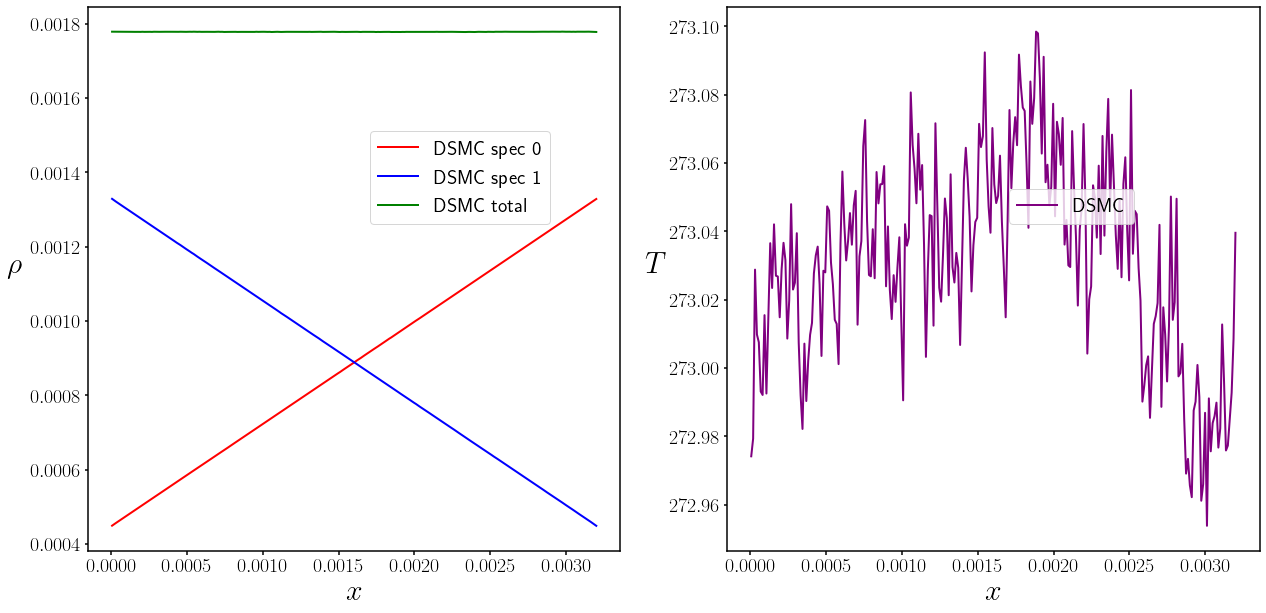

In [22]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)


ax1 = fig.add_subplot(1,2,1)

ax1.plot(xtest1,xdata1,color='red',linewidth=2, label='DSMC spec 0')
ax1.plot(xtest2,xdata2,color='blue',linewidth=2, label='DSMC spec 1')
ax1.plot(xtest3,xdata3,color='green',linewidth=2, label='DSMC total')
#ax1.plot(xDSMC,y1b,color='red',linewidth=2,linestyle='dashed', label='DSMC spec 0')
#ax1.plot(xDSMC,y2b,color='blue',linewidth=2,linestyle='dashed', label='DSMC spec 1')
#ax1.plot(x1a, y1b+y2b,color='green',linewidth=2, label='DSMC total',linestyle='dashed')
#ax1.plot([0,0.0004], [0.000658,0.000658],color='orange',linewidth=2)
#ax1.plot([0,0.0004], [0.001316,0.001316],color='orange',linewidth=2)
#ax1.plot(xDSMC, y2b,color='blue',linewidth=2,linestyle='dashed', label='DSMC spec 1')
#ax1.plot(xDSMC, y1b+y2b,color='green',linewidth=2,linestyle='dashed', label='DSMC total')
#ax1.plot(xFHD,yFHD1,color='red',linewidth=2,linestyle='dashed', label='FHD spec 0')
#ax1.plot(xFHD,yFHD2,color='blue',linewidth=2,linestyle='dashed', label='FHD spec 1')
#ax1.plot(xFHD,yFHD4,color='black',linewidth=2,linestyle='dashed', label='FHD total')


ax1.set_xlabel(r'$x$', fontsize=30)
ax1.set_ylabel(r"$\rho$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.53,0.6),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)


ax2 = fig.add_subplot(1,2,2)


#ax2.plot(xDSMC,y3a,color='purple',linewidth=2, label='DSMC')

ax2.plot(xtest4,xdata4,color='purple',linewidth=2, label='DSMC')
#ax2.plot(x3b,y3b,color='purple',linewidth=2, label='DSMC',linestyle='dashed')
#ax2.plot(xDSMC,y3b,color='green',linewidth=2, label='2')
#ax2.plot(xDSMC,y3c,color='orange',linewidth=2, label='2 million development')
#ax2.plot(xFHD,yFHD3,color='black',linewidth=2,linestyle='dashed', label='FHD')

ax2.set_xlabel(r'$x$', fontsize=30)
ax2.set_ylabel(r"$T$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax2.tick_params(labelsize=20)
ax2.legend(loc=(0.53,0.6),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)

fig.savefig("profiles.pdf", bbox_inches = 'tight', pad_inches = 0.05)

In [26]:
xdata1[0]/xdata3[0]

0.2528088158841185

In [18]:
y2a[0]/(y1a[0]+y2a[0])

NameError: name 'y2a' is not defined

In [58]:
time = "/pltcu0000"+"04000000/"
direc="~/giganScratch/SFtest5"
#direc="~/gigan/projects/FHDeX/exec/DSMC"
x1b, y1b = return_y_plt(direc,time,nbins=256,field="JxMean")
x2b, y2b = return_y_plt(direc,time,nbins=256,field="JxMean_00")
x3b, y3b = return_y_plt(direc,time,nbins=256,field="JxMean_01")


x4b, y4b = return_y_plt(direc,time,nbins=256,field="rhoMean")
x5b, y5b = return_y_plt(direc,time,nbins=256,field="rhoMean_00")
x6b, y6b = return_y_plt(direc,time,nbins=256,field="rhoMean_01")

time = "/pltprim0000"+"04000000/"
x7b, y7b = return_y_plt(direc,time,nbins=256,field="uMean")
x8b, y8b = return_y_plt(direc,time,nbins=256,field="uMean_00")
x9b, y9b = return_y_plt(direc,time,nbins=256,field="uMean_01")


yt : [INFO     ] 2022-08-19 15:41:05,460 Parameters: current_time              = 0.00047999988002302407
yt : [INFO     ] 2022-08-19 15:41:05,462 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-08-19 15:41:05,463 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-19 15:41:05,464 Parameters: domain_right_edge         = [3.20512e-03 4.00640e-04 1.25200e-07]
yt : [INFO     ] 2022-08-19 15:41:07,254 Parameters: current_time              = 0.00047999988002302407
yt : [INFO     ] 2022-08-19 15:41:07,256 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-08-19 15:41:07,257 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-19 15:41:07,258 Parameters: domain_right_edge         = [3.20512e-03 4.00640e-04 1.25200e-07]
yt : [INFO     ] 2022-08-19 15:41:08,811 Parameters: current_time              = 0.00047999988002302407
yt : [INFO     ] 2022-08-19 15:41:08,812 Parameters: domain_dimensions      

ValueError: x and y must have same first dimension, but have shapes (256,) and (128,)

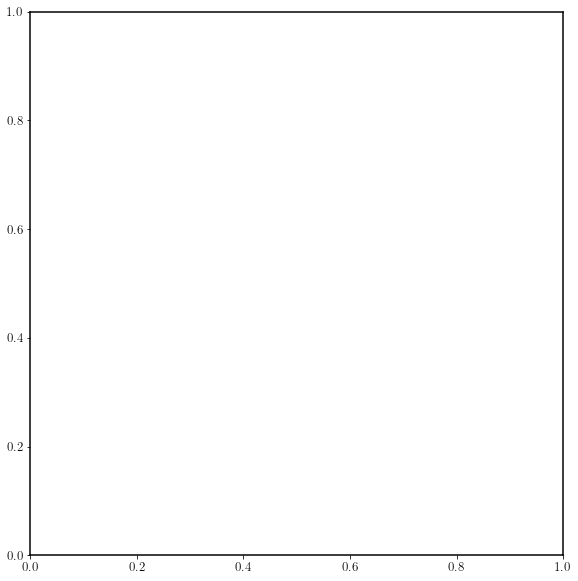

In [59]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,10])
plt.subplots_adjust(wspace=0.20)


ax1 = fig.add_subplot(1,2,1)

#ax1.plot(xDSMC,y1,color='red',linewidth=2, label='DSMC spec 1')
#ax1.plot(xDSMC,y2,color='blue',linewidth=2, label='DSMC spec 2')
#ax1.plot(xDSMC,y5a,color='green',linewidth=2, label='DSMC total')
#ax1.plot(xDSMC,y5b,color='purple',linewidth=2, label='DSMC total')
ax1.plot(xDSMC,y1b/y4b,color='purple',linewidth=2, label='DSMC total')
ax1.plot(xDSMC,y2b/y5b,color='green',linewidth=2, label='DSMC total')
ax1.plot(xDSMC,y3b/y6b,color='orange',linewidth=2, label='DSMC total')

ax1.plot(xDSMC,y7b,color='purple',linewidth=3,linestyle='dashed', label='DSMC total')
ax1.plot(xDSMC,y8b,color='green',linewidth=3,linestyle='dashed', label='DSMC total')
ax1.plot(xDSMC,y9b,color='orange',linewidth=3,linestyle='dashed', label='DSMC total')

#ax1.plot(xDSMC,y5c,color='orange',linewidth=2, label='DSMC total')
#ax1.plot(xDSMC,y5c,color='blue',linewidth=2, label='DSMC total')
#ax1.plot(xDSMC,y4b,color='purple',linewidth=2, label='DSMC total')
#ax1.plot(xFHD,yFHD4,color='red',linewidth=2,linestyle='dashed', label='FHD spec 1')
#ax1.plot(xDSMC,rhoSum,color='blue',linewidth=2,linestyle='dashed', label='DSMC sum')


ax1.set_xlabel(r'$x$', fontsize=30)
ax1.set_ylabel(r"$u$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.53,0.6),fontsize=20)
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)


#ax2 = fig.add_subplot(1,2,2)

#ax2.plot(xDSMC,y3a,color='red',linewidth=2, label='DSMC')
#ax2.plot(xDSMC,y3b,color='black',linewidth=2, label='DSMC')
#ax2.plot(xDSMC,y3c,color='black',linewidth=2, label='DSMC')
#ax2.plot(xFHD,yFHD3,color='black',linewidth=2,linestyle='dashed', label='FHD')


#ax2.set_xlabel(r'$x$', fontsize=30)
#ax2.set_ylabel(r"$T$", fontsize=30,rotation=0, labelpad=15)
#ax1.set_ylim([-20,1444])
#ax1.set_xlim([-0.1e-7,2e-7])
#ax2.tick_params(labelsize=20)
#ax2.legend(loc=(0.53,0.6),fontsize=20)
#ax2.xaxis.set_tick_params(width=1.5)
#ax2.yaxis.set_tick_params(width=1.5)

fig.savefig("vel.pdf", bbox_inches = 'tight', pad_inches = 0.05)

In [142]:
y3b[-1]

13444.556344363755

In [143]:
y2b[0]

-13442.698934032496

In [10]:
filename = '/home/drladiges/Downloads/correl_neq1.txt'
data = np.loadtxt(filename, delimiter=' ', skiprows=1, dtype=str)



LL=len(data)
xFHDb=[]
yFHD1b=[]
yFHD2b=[]
yFHD3b=[]
for i in range(LL):
    val=float(data[i,0])
    xFHDb.append(val)
    #fhdcell=(xFHDb[1]-xFHDb[0])**3;
    #dsmccell=(3.84e-04/128)*((0.035e-4)**2);
    #cellRat=fhdcell/dsmccell
    
    val1=float(data[i,4])*cellRat
    val2=float(data[i,5])*cellRat
    val3=float(data[i,6])*cellRat
    yFHD1b.append(val1)
    yFHD2b.append(val2)
    yFHD3b.append(val3)


NameError: name 'cellRat' is not defined

In [42]:
time = "/pltvar0000"+"00050000/"
x1b, y1b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="rho_00*.rho_00")
x2b, y2b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="u*.rho_00")
x3b, y3b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="rho_00*.rho_01")
x4b, y4b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="T*.T")
x5b, y5b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="rho*.rho")
x6b, y6b = return_y_plt('~/gigan/projects/FHDeX/exec/DSMC',time,nbins=128,field="rhoVar")

yt : [ERROR    ] 2022-08-19 12:47:39,381 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2022-08-19 12:47:39,382 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('/home/drladiges/gigan/projects/FHDeX/exec/DSMC/pltvar000000050000/',) {}, but could not load!

In [33]:
time = "/pltvar0000"+"09000000/"
direc="~/giganScratch/SFtest5"
#direc="~/gigan/projects/FHDeX/exec/DSMC"
x1b, y1b = return_y_plt(direc,time,nbins=256,field="rho.u")
x2b, y2b = return_y_plt(direc,time,nbins=256,field="rho0.u")
#x2b, y2b = return_y_plt(direc,time,nbins=128,field="rho_01*.rho_01")
x3b, y3b = return_y_plt(direc,time,nbins=256,field="rho0.u0")
x4b, y4b = return_y_plt(direc,time,nbins=256,field="rhoVar_00")
#x5b, y5b = return_y_plt(direc,time,nbins=128,field="rhoVar")
#x6b, y6b = return_y_plt(direc,time,nbins=128,field="u*.rho_01")

yt : [INFO     ] 2022-08-22 11:43:46,853 Parameters: current_time              = 0.001079999879797688
yt : [INFO     ] 2022-08-22 11:43:46,855 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-08-22 11:43:46,856 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-22 11:43:46,857 Parameters: domain_right_edge         = [3.20512e-03 4.00640e-04 1.25200e-07]
yt : [INFO     ] 2022-08-22 11:43:47,763 Parameters: current_time              = 0.001079999879797688
yt : [INFO     ] 2022-08-22 11:43:47,764 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-08-22 11:43:47,766 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-22 11:43:47,767 Parameters: domain_right_edge         = [3.20512e-03 4.00640e-04 1.25200e-07]
yt : [INFO     ] 2022-08-22 11:43:48,543 Parameters: current_time              = 0.001079999879797688
yt : [INFO     ] 2022-08-22 11:43:48,544 Parameters: domain_dimensions         = [

In [15]:
dsmccell= ((0.00320512/256)**2)*(1.252e-7/4)
nc=256
LL=0.00320512
cs=LL/nc
xDSMC=np.linspace(0.5*cs,LL-0.5*cs,nc)

In [25]:
y3b*dsmccell

array([-8.06327915e-23, -4.28139493e-22, -4.20676033e-22, -3.05577438e-22,
       -4.25404562e-22, -5.99694172e-22, -5.34317046e-22, -3.39604411e-22,
       -4.15889213e-22, -2.96537620e-22, -3.79361655e-22, -4.36339125e-22,
       -4.18489451e-22, -4.45874611e-22, -4.32891127e-22, -4.09887384e-22,
       -4.04605648e-22, -5.93789347e-22, -3.05262928e-22, -3.86197218e-22,
       -4.20415545e-22, -2.74044859e-22, -5.68711553e-22, -6.04022559e-22,
       -2.83230430e-22, -4.73596995e-22, -3.47679535e-22, -4.09041608e-22,
       -5.16835983e-22, -5.20409311e-22, -3.91912240e-22, -4.26119109e-22,
       -4.73823183e-22, -3.67858568e-22, -4.26124454e-22, -6.25881385e-22,
       -4.53002274e-22, -2.83166013e-22, -5.94945846e-22, -4.11033266e-22,
       -3.39314049e-22, -3.45442188e-22, -1.51877908e-22, -6.30988349e-22,
       -4.28636696e-22, -6.78555854e-22, -4.68230664e-22, -2.15889133e-22,
       -4.02204143e-22, -2.42995285e-22, -4.26393375e-22, -3.90082425e-22,
       -5.32215482e-22, -

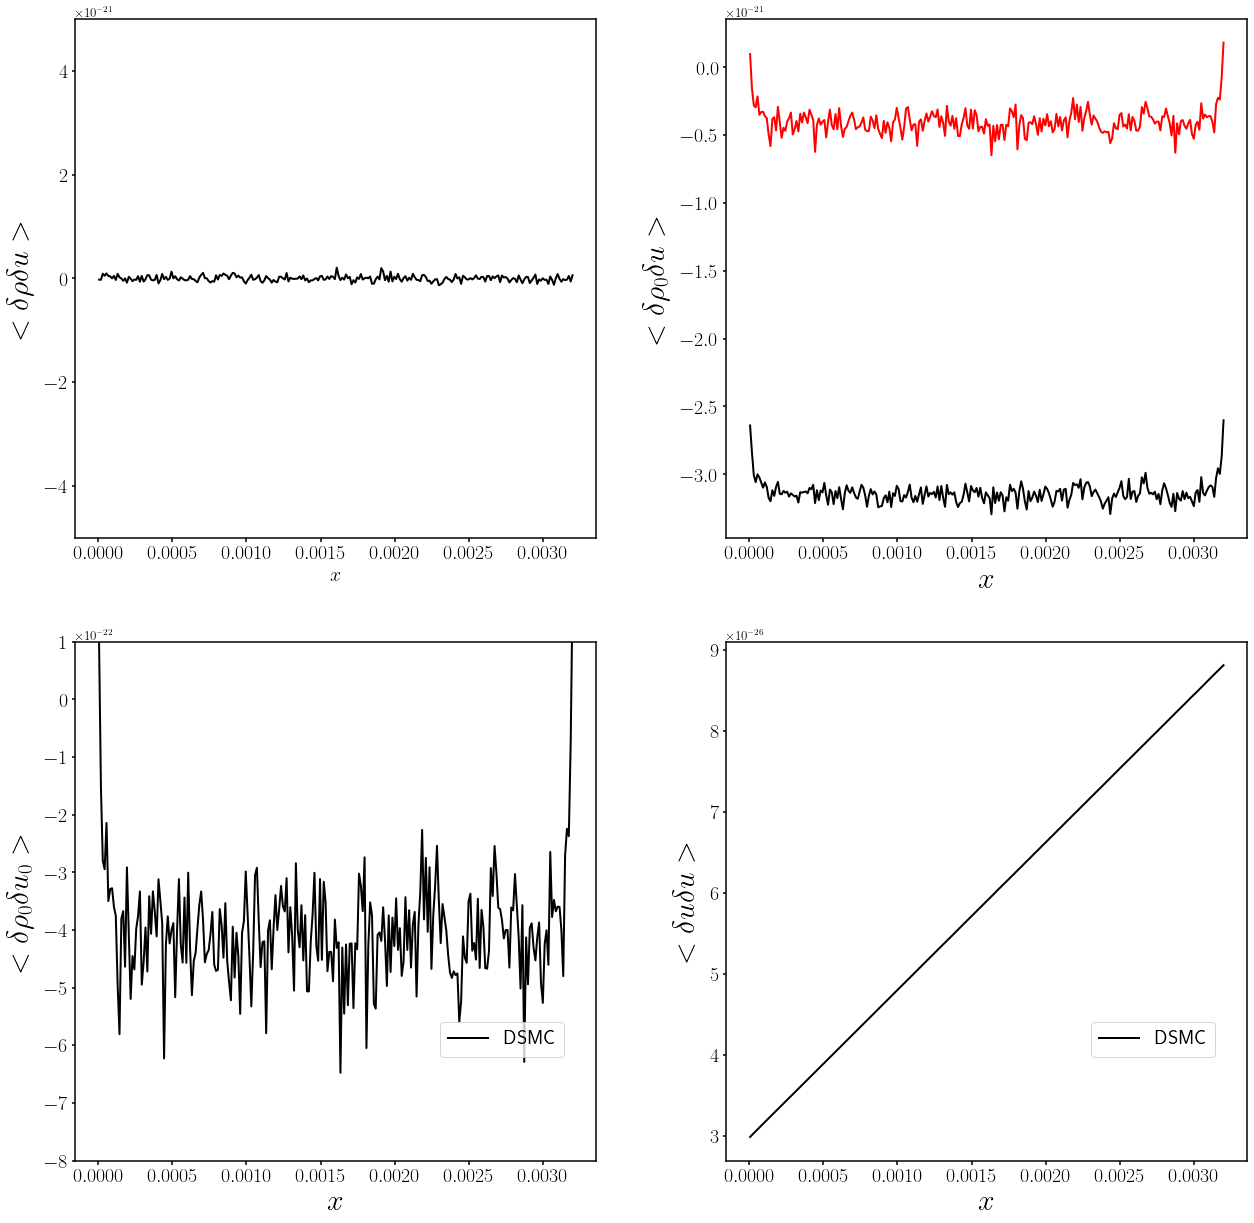

In [36]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,21])
plt.subplots_adjust(wspace=0.25)


ax1 = fig.add_subplot(2,2,1)

ax1.plot(xDSMC,dsmccell*y1b,color='black',linewidth=2)
#ax1.plot(xFHDb,yFHD1b,color='black',linewidth=2,linestyle='dashed', label='FHD')



ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r"$<\delta \rho \delta u>$", fontsize=30,rotation=90, labelpad=10)
ax1.tick_params(labelsize=20)
#ax1.legend(loc=(0.7,0.8),fontsize=20)
ax1.set_ylim([-5e-21,5e-21])
#ax1.set_ylim([-10e-21,5e-21])
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)



ax2 = fig.add_subplot(2,2,2)

ax2.plot(xDSMC,dsmccell*y2b,color='black',linewidth=2, label='DSMC')
ax2.plot(xDSMC,dsmccell*y3b,color='red',linewidth=2, label='DSMC')
#ax2.plot(xFHDb,yFHD3b,color='black',linewidth=2,linestyle='dashed', label='FHD')

ax2.set_xlabel(r'$x$', fontsize=30)
ax2.set_ylabel(r"$<\delta \rho_0 \delta u >$", fontsize=30,rotation=90, labelpad=10)
#ax2.set_ylabel(r"$<\delta T^*\delta T>$", fontsize=30,rotation=90, labelpad=10)
#ax2.set_ylim([-4e-21,1e-21])
#ax1.set_xlim([-0.1e-7,2e-7])
ax2.tick_params(labelsize=20)
#ax2.legend(loc=(0.7,0.2),fontsize=20)
ax2.xaxis.set_tick_params(width=1.5)
ax2.yaxis.set_tick_params(width=1.5)

fig.savefig("correlations.pdf", bbox_inches = 'tight', pad_inches = 0.05)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(xDSMC,dsmccell*y3b,color='black',linewidth=2, label='DSMC')

ax3.set_xlabel(r'$x$', fontsize=30)
ax3.set_ylabel(r"$<\delta \rho_0 \delta u_0 >$", fontsize=30,rotation=90, labelpad=10)
ax3.set_ylim([-8e-22,1e-22])
ax3.tick_params(labelsize=20)
ax3.legend(loc=(0.7,0.2),fontsize=20)
ax3.xaxis.set_tick_params(width=1.5)
ax3.yaxis.set_tick_params(width=1.5)

ax4 = fig.add_subplot(2,2,4)
ax4.plot(xDSMC,dsmccell*y4b,color='black',linewidth=2, label='DSMC')
ax4.set_xlabel(r'$x$', fontsize=30)
ax4.set_ylabel(r"$<\delta u \delta u>$", fontsize=30,rotation=90, labelpad=10)
#ax4.set_ylim([-5e-21,5e-21])
ax4.tick_params(labelsize=20)
ax4.legend(loc=(0.7,0.2),fontsize=20)
ax4.xaxis.set_tick_params(width=1.5)
ax4.yaxis.set_tick_params(width=1.5)

In [37]:
np.mean(dsmccell*y2b)

-3.137723418747062e-21

In [85]:
dsmccell*y3b

array([-3.01383489e-21, -2.52042883e-21,  5.59758086e-21, -2.27480677e-22,
        3.57173130e-21, -4.16496916e-22, -2.52184867e-21,  2.33822063e-21,
       -9.21693134e-22,  4.39852989e-21,  1.11779211e-21,  6.40534800e-22,
        1.15079664e-21, -5.14260697e-21, -3.06010005e-21, -4.66874052e-21,
       -7.41429290e-21, -4.86810260e-21, -3.13190055e-21,  5.30945242e-21,
        4.40557868e-21,  6.70980192e-21,  4.80848054e-21,  8.02941063e-21,
       -4.69594414e-21, -1.18016882e-21, -5.30935178e-23,  9.49753395e-21,
       -1.55031797e-21,  5.49141973e-21, -7.39383855e-21,  2.74976974e-21,
       -4.49550116e-20,  3.36215858e-21, -8.06505940e-22, -3.43138568e-21,
       -4.55675370e-22, -5.91491560e-21, -3.83000958e-21,  5.13879100e-21,
       -7.84372957e-21,  8.36285646e-22, -1.53249247e-22,  1.88087478e-21,
       -3.13275961e-21,  1.69275570e-21,  3.60638128e-22, -7.84254760e-21,
       -7.65673191e-21,  5.45725042e-21,  3.86968830e-21,  2.38799491e-21,
       -8.92986987e-21, -

In [15]:
time = "plt_SF_prim_mag000100000"
#x1b, y1b = return_y_plt('~/giganScratch/SFtest/',time,nbins=32,field="struct_fact_rhoInstant_00_uInstant_00")
x1b, y1b = return_y_plt('~/giganScratch/SFtest2/',time,nbins=32,field="struct_fact_rhoInstant_00_uInstant_00")
#x2b, y2b = return_y_plt('~/giganScratch/SFtest',time,nbins=128,field="T*.rho")
#x3b, y3b = return_y_plt('~/giganScratch/SFtest',time,nbins=128,field="T*.T")
#x4b, y4b = return_y_plt('~/giganScratch/SFtest',time,nbins=128,field="TVar")
#x5b, y5b = return_y_plt('~/giganScratch/SFtest',time,nbins=128,field="rhoVar")
#x6b, y6b = return_y_plt('~/giganScratch/SFtest',time,nbins=128,field="rhoVar")

yt : [INFO     ] 2022-07-04 18:20:25,408 Parameters: current_time              = 9.999900000009797e-06
yt : [INFO     ] 2022-07-04 18:20:25,410 Parameters: domain_dimensions         = [256  32   1]
yt : [INFO     ] 2022-07-04 18:20:25,411 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2022-07-04 18:20:25,412 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]


In [9]:
def return_y_plt(folder,time,nbins,field):
    ds = yt.load(folder+time)
    ad = ds.all_data()
    plot = yt.SlicePlot(ad,"y",[field])
    #plot = yt.plot_2d(ad,"y",[field])
    #profile = plot.profiles[0]
    #x = np.array(profile.x)
    #y = np.array(profile[field])
    x=1
    y=1
    return x, y

yt : [INFO     ] 2022-07-01 10:57:08,235 Parameters: current_time              = 4.999899999998835e-06
yt : [INFO     ] 2022-07-01 10:57:08,236 Parameters: domain_dimensions         = [256  32   1]
yt : [INFO     ] 2022-07-01 10:57:08,237 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2022-07-01 10:57:08,239 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]


2.4513488916553144e-10

In [18]:
dsmccell

4.90628752e-18

In [60]:
xlin=np.array([x1b[16],x1b[24],x1b[-1]])
ylin=np.array([1/(xlin[0]**2),1/(xlin[1]**2),1/(xlin[2]**2)])
print(xlin)
print(ylin)

[  7596.39048314 129138.63821338 235488.10497733]
[1.73294763e-08 5.99635857e-11 1.80327537e-11]


In [29]:
time = "plt_SF_prim_mag005000000"
#xtest, ytest, ztest, datatest = return_data("~/giganScratch/SFtest2/"+time,[256,32,1],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_rhoInstant_00_uInstant_00")
#xtest, ytest, ztest, datatest = return_data("~/giganScratch/SFtest2/"+time,[256,32,1],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_uInstant_rhoInstant_00")
xtest1, ytest1, ztest1, datatest1 = return_data("~/giganScratch/SFtest7/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_uInstant_rhoInstant_00")
xtest2, ytest2, ztest2, datatest2 = return_data("~/giganScratch/SFtest7/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_rhoInstant_00_uInstant_00")
time = "plt_SF_prim_mag004000000"
xtest3, ytest3, ztest3, datatest3 = return_data("~/giganScratch/SFtest7/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_uInstant_rhoInstant_00")
xtest4, ytest4, ztest4, datatest4 = return_data("~/giganScratch/SFtest7/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_rhoInstant_00_uInstant_00")
#xtest, ytest, ztest, datatest = return_data("~/gigan/projects/FHDeX/exec/DSMC/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_uInstant_rhoInstant_00")
#xtest, ytest, ztest, datatest = return_data("~/gigan/projects/FHDeX/exec/DSMC/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_rhoInstant_00_uInstant_00")
#xtest, ytest, ztest, datatest = return_data("~/giganScratch/SFtest3/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_uInstant_00_cInstant_00")
#xtest, ytest, ztest, datatest = return_data("~/gigan/projects/FHDeX/exec/DSMC/"+time,[256,32,1],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_cInstant_01_cInstant_01")
#xtest, ytest, ztest, datatest = return_data("~/gigan/projects/FHDeX/exec/DSMC/"+time,[256,32,4],[0,0,0],[0.00320512,0.00040064,2.504e-05],"struct_fact_rhoInstant_00_rhoInstant_00")

yt : [INFO     ] 2022-09-19 14:20:28,123 Parameters: current_time              = 0.0005999998799809497
yt : [INFO     ] 2022-09-19 14:20:28,124 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-09-19 14:20:28,125 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2022-09-19 14:20:28,126 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]
yt : [INFO     ] 2022-09-19 14:20:29,235 Parameters: current_time              = 0.0005999998799809497
yt : [INFO     ] 2022-09-19 14:20:29,236 Parameters: domain_dimensions         = [256  32   4]
yt : [INFO     ] 2022-09-19 14:20:29,237 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2022-09-19 14:20:29,237 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]
yt : [INFO     ] 2022-09-19 14:20:30,317 Parameters: current_time         

In [42]:
ydata1 = datatest1[128,17:32,2]

ydata2 = datatest2[128,17:32,2]

ydata3 = datatest3[128,17:32,2]

ydata4 = datatest4[128,17:32,2]


In [41]:
print(ydata1/dsmccell)

[0.01111399 0.00377894 0.00191053 0.00128092 0.00139996 0.00086168
 0.00052834 0.00107999 0.00076739 0.00086899 0.00055465 0.00061199
 0.00045337 0.00057368 0.00035607]


In [14]:
ydata2

array([5.27260084e-20, 1.27119912e-20, 4.46793678e-21, 3.01986322e-21,
       3.52887352e-21, 2.85412077e-21, 1.37326713e-21, 1.68450421e-21,
       8.13089063e-22, 1.02136937e-21, 7.70905704e-22, 6.04481560e-22,
       5.54559201e-22, 6.34527699e-22, 6.84755686e-22])

In [17]:
dx=dsmccell

In [16]:
dsmccell

NameError: name 'dsmccell' is not defined

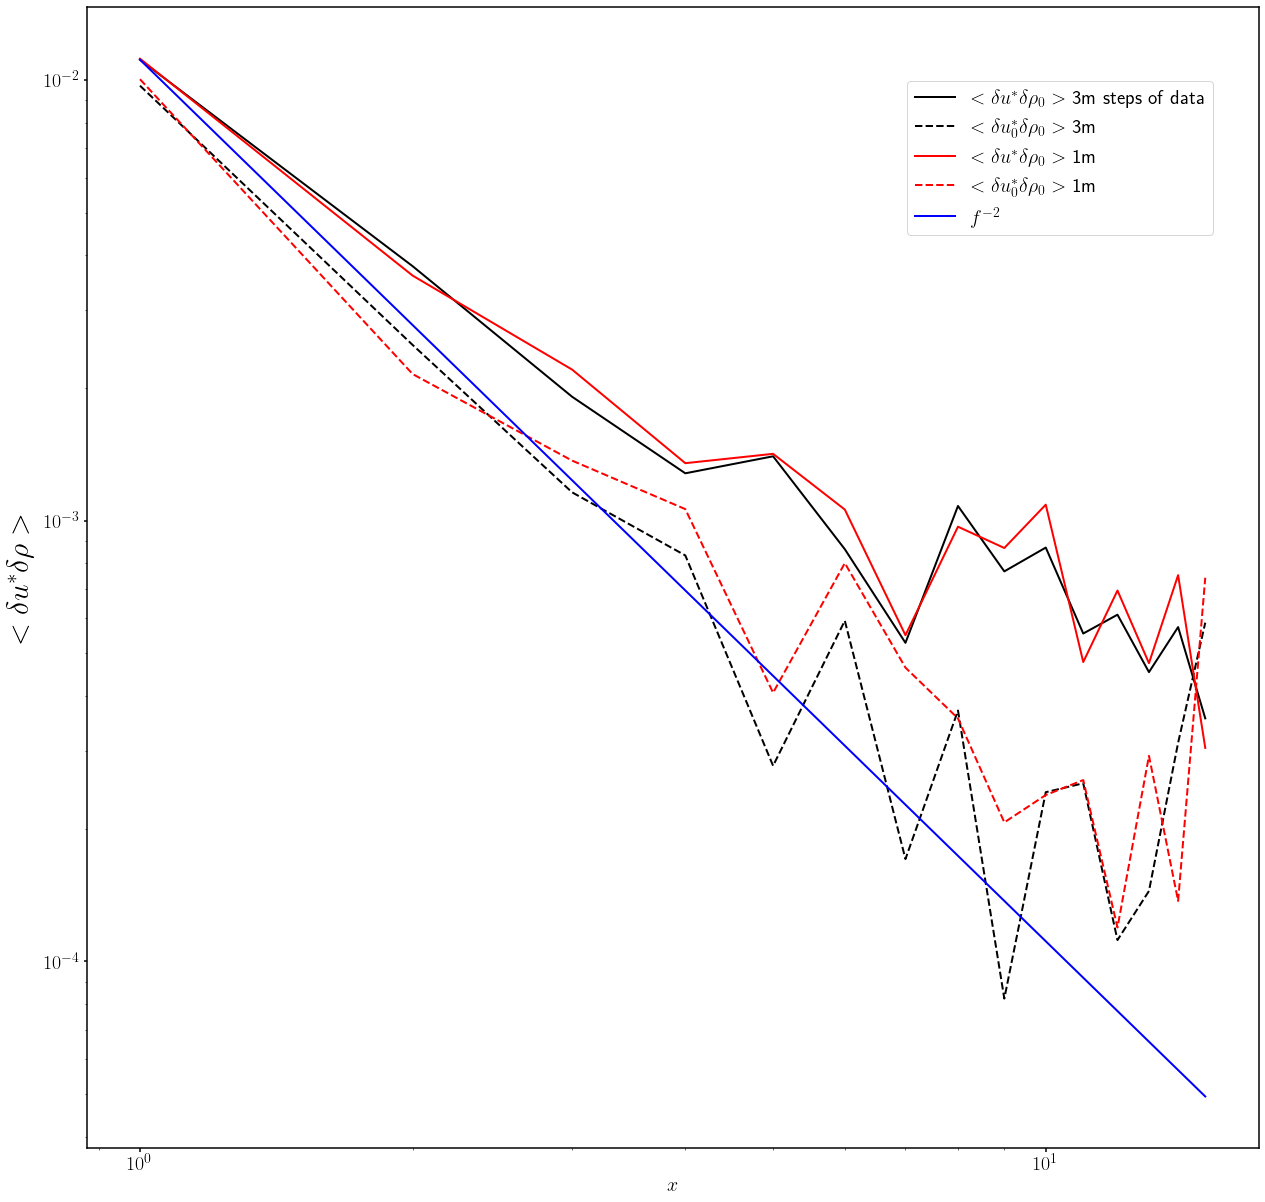

In [33]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rc('axes', linewidth=1.5)
fig = plt.figure(figsize=[21,21])
plt.subplots_adjust(wspace=0.25)

xd=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
xl=[1,15]
yl=[ydata1[0]/dx,ydata1[0]*1/(15**2)/dx]
ax1 = fig.add_subplot(1,1,1)

#ax1.plot(1.252e-5*ytest/(4*3.142),ydata,color='black',linewidth=2, label='DSMC')
ax1.plot(xd,ydata1/dx,color='black',linewidth=2, label=r"$<\delta u^*\delta \rho_0>$ 3m steps of data")
ax1.plot(xd,ydata2/dx,color='black',linewidth=2,linestyle='dashed', label=r"$<\delta u_0^*\delta \rho_0>$ 3m")
ax1.plot(xd,ydata3/dx,color='red',linewidth=2, label=r"$<\delta u^*\delta \rho_0>$ 1m")
ax1.plot(xd,ydata4/dx,color='red',linewidth=2,linestyle='dashed', label=r"$<\delta u_0^*\delta \rho_0>$ 1m")
ax1.plot(xl,yl,color='blue',linewidth=2, label='$f^{-2}$')



#ax1.plot(xFHDb,yFHD1b,color='black',linewidth=2,linestyle='dashed', label='FHD')


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r'$x$', fontsize=20)
ax1.set_ylabel(r"$<\delta u^*\delta \rho>$", fontsize=30,rotation=90, labelpad=10)
ax1.tick_params(labelsize=20)
ax1.legend(loc=(0.7,0.8),fontsize=20)
#ax1.set_ylim([-100e-21,50e-21])
#ax1.set_ylim([-10e-21,5e-21])
ax1.xaxis.set_tick_params(width=1.5)
ax1.yaxis.set_tick_params(width=1.5)






In [261]:
range(10)

range(0, 10)

In [52]:

dsmccell

3.675e-17

In [9]:
#fhdcell=(xFHD[1]-xFHD[0])**3;
dsmccell=(3.84e-04/128)*((0.035e-4)*(0.035e-4));
#cellRat=fhdcell/dsmccell

In [22]:
y4b

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [49]:
dsmccell

3.675e-17

In [66]:
fhdcell

2.2644984342943527e-16

In [48]:
fhdc=xFHD[2]-xFHD[1]

In [49]:
dsmcc=xDSMC[2]-xDSMC[1]

In [52]:
xFHD[0]

3e-06

In [53]:
xDSMC[1]-dsmcc/2

3.000000000000001e-06

In [57]:
xFHD[0]

3e-06

In [56]:
time = "plt_SF_prim_mag000000001.old.21552200"
x1b, y1b = return_y_plt('~/giganScratch/SFtest/',time,nbins=128,field="struct_fact_rhoInstant_00_uInstant_00")

0.00038250000000000003

In [13]:

ds = yt.load("~/giganScratch/SFtest/plt_SF_prim_mag000000001.old.21552200")
ad = ds.all_data()
plot = yt.ProfilePlot(ad,"y",["struct_fact_rhoInstant_00_uInstant_00"],weight_field="cell_volume",x_log=False,y_log={field:False},n_bins=nbins)
profile = plot.profiles[0]
x = np.array(profile.y)
y = np.array(profile[field])


yt : [INFO     ] 2022-07-01 09:49:35,697 Parameters: current_time              = 1.399900000000093e-06
yt : [INFO     ] 2022-07-01 09:49:35,698 Parameters: domain_dimensions         = [256  32   1]
yt : [INFO     ] 2022-07-01 09:49:35,699 Parameters: domain_left_edge          = [-250925.93079791 -250925.93079791 -250925.93079791]
yt : [INFO     ] 2022-07-01 09:49:35,701 Parameters: domain_right_edge         = [250925.93079791 250925.93079791 250925.93079791]


NameError: name 'field' is not defined